# Linear Regression

Linear Regression is one of the most fundamental algorithms in the Machine Learning world. It is the door to the magical world ahead.
But before proceeding with the algorithm, let’s first discuss the lifecycle of any machine learning model. This diagram explains the creation of a Machine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements. 
A typical lifecycle diagram for a machine learning model looks like:

<img src="MLApplicationFlow_bold.PNG" width= "300">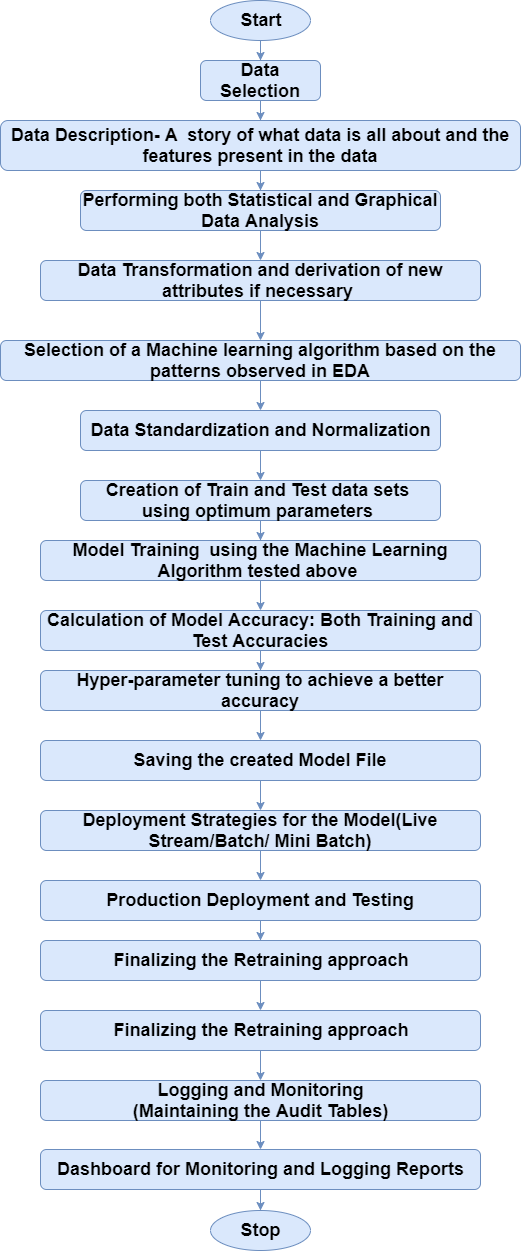
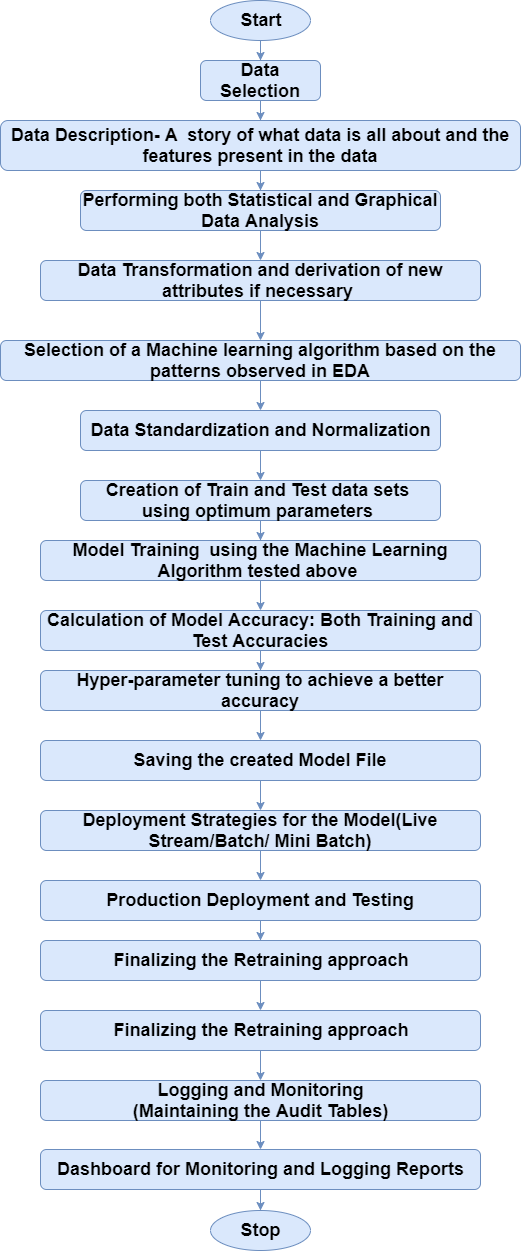

Now, let's take our discussion of Linear Regression further

## What is Regression Analysis?

Regression in statistics is the process of predicting a Label(or Dependent Variable) based on the features(Independent Variables) at hand. Regression is used for time series modelling and finding the causal effect relationship between the variables and forecasting. For example, the relationship between the stock prices of the company and various factors like customer reputation and company annual performance etc. can be studied using regression.


Regression analysis is an important tool for analysing and modelling data. Here, we fit a curve/line to the data points, in such a manner that the differences between the distance of the actual data points from the plotted curve/line is minimum. The topic will be explained in detail in the coming sections.


## The use of Regression

Regression analyses the relationship between two or more features. Let’s take an example:

Let’s suppose we want to make an application which predicts the chances of admission a student to a foreign university. In that case, the 

The benefits of using Regression analysis are as follows:

   * It shows the significant relationships between the Lable (dependent variable) and the features(independent variable).
   * It shows the extent of the impact of multiple independent variables on the dependent variable.
   *  It can also measure these effects even if the variables are on a different scale.

These features enable the data scientists to find the best set of independent variables for predictions.


## Linear Regression

Linear Regression is one of the most fundamental and widely known Machine Learning Algorithms which people start with. Building blocks of a Linear Regression Model are:
* Discreet/continuous independent variables
* A best-fit regression line
* Continuous dependent variable.
i.e., A Linear Regression model predicts the dependent variable using a regression line based on the independent variables.
The equation of the Linear Regression is:

                                                Y=a+b*X + e 

 Where,
 a is the intercept, 
b is the slope of the line, 
and e is the error term. 
The equation above is used to predict the value of the target variable based on the given predictor variable(s).


### The Problem statement:

This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?



In [15]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import pickle
% matpllotlib inline

UsageError: Line magic function `%` not found.


In [16]:
data= pd.read_csv('Advertising.csv') # Reading the data file

In [17]:
data.head() # checking the first five rows from the dataset

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio
- Newspaper: Advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [18]:
data.shape

(200, 5)

In [19]:
data.info() # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [20]:
data.isna().sum() # finding the count of missing values from different columns

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Now, let's showcase the relationship between the feature and target column

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


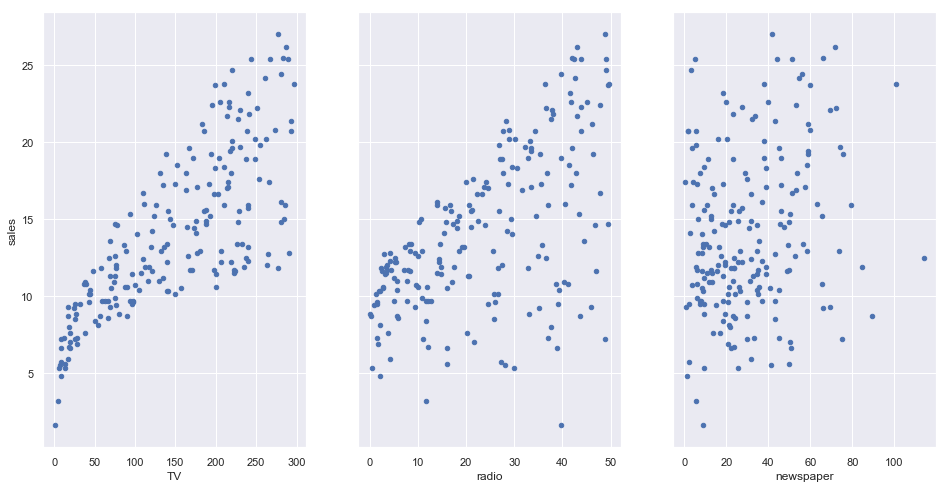

In [21]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

## Questions about the data

A generic question shall be: How the company should optimise the spends on advertising to maximise the sales?

These general questions might lead you to more specific questions:
1. What’s the relationship between ads and sales?
2. How prominent is that relationship?
3. Which ad types contribute to sales?
4. How each ad contributes to sales?
5. Can sales be predicted based on the expense of the advertisement?

We will explore these questions below!



From the relationship diagrams above, it can be observed that there seems to be a linear relationship between the features TV ad,  Radio ad and the sales is almost a linear one. A linear relationship typically looks like:
<img src="LinearGraph.png" width="300">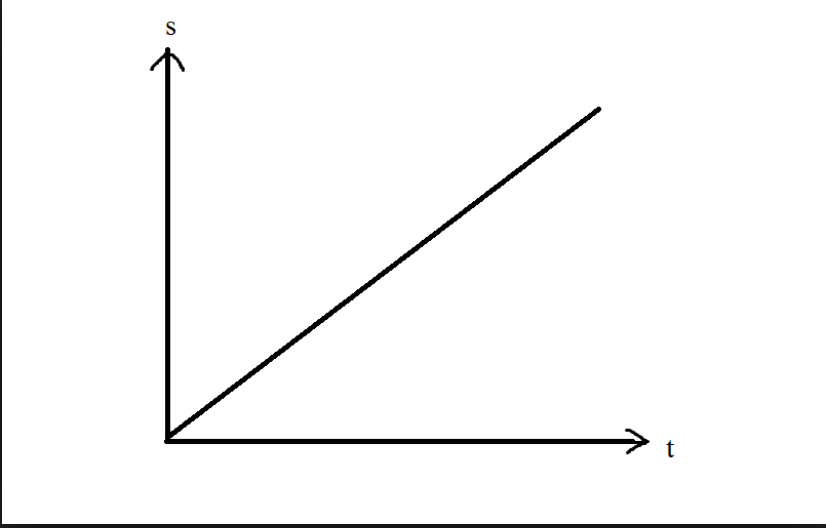

Hence, we can build a model using the Linear Regression Algorithm.


## Simple Linear Regression

Simple Linear regression is a method for predicting a **quantitative response** using a **single feature** ("input variable"). The mathematical equation is:

$y = \beta_0 + \beta_1x$

What do terms represent?
- $y$ is the response or the target variable
- $x$ is the feature
- $\beta_1$ is the coefficient of x
- $\beta_0$ is the intercept

$\beta_0$ and $\beta_1$ are the **model coefficients**. To create a model, we must "learn" the values of these coefficients. And once we have the value of these coefficients, we can use the model to predict the Sales!


#### Estimating ("Learning") Model Coefficients

The coefficients are estimated using the **least-squares criterion**,  i.e., the best fit line has to be calculated that minimizes the **sum of squared residuals** (or "sum of squared errors").


### The mathematics involved
Take a quick look at the plot created. Now consider each point, and know that each of them has a coordinate in the form (X, Y). Now draw an imaginary line between each point and the current "best-fit" line. We'll call the distance between each point and the current best-fit line as D. To get a quick image of what we're trying to visualize, take a look at the picture below:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png">

What elements are present in the diagram?
- The red points are the **observed values** of x and y.
- The blue line is the **least squares line**.
- The green lines are the **residuals**, which is the distance between the observed values and the least squares line.


Before, we're labelling each green line as having a distance D, and each red point as having a coordinate of (X, Y). Then we can define our best fit line as the line having the property were:
$$ D_{1}^2 + D_{2}^2 + D_{3}^2 + D_{4}^2 + ....+ D_{N}^2$$

So how do we find this line? The least-square line approximating the set of points:

$$ (X,Y)_{1},(X,Y)_{2},(X,Y)_{3},(X,Y)_{4},(X,Y)_{5}, $$

has the equation:
$$ Y = a_{0} +a_{1}X $$
this is basically just a rewritten form of the standard equation for a line:
$$Y=mx+b$$

We can solve for these constants a0 and a1 by simultaneously solving these equations:
$$ \Sigma Y = a_{0}N + a_{1}\Sigma X $$
$$ \Sigma XY = a_{0}\Sigma X + a_{1}\Sigma X^2 $$
These are called the normal equations for the least-squares line. There are further steps that can be taken in rearranging these equations to solve for y, but we'll let scikit-learn do the rest of the heavy lifting here.


Let’s see the underlying assumptions: -
* The regression model is linear in terms of coefficients and error term.
* The mean of the residuals is zero.
* The error terms are not correlated with each other, i.e. given an error value; we cannot predict the next error value.
* The independent variables(x) are uncorrelated with the residual term, also termed as **exogeneity**. This, in layman term, generalises that in no way should the error term be predicted given the value of independent variables.
* The error terms have a constant variance, i.e. **homoscedasticity**.
* No Multicollinearity, i.e. no independent variables should be correlated with each other or affect one another. If there is multicollinearity, the precision of prediction by the OLS model decreases.
* The error terms are normally distributed.


The general equation of a straight line is:$$𝑦={mx+b}$$
It means that if we have the value of m and b, we can predict all the values of y for corresponding x.
During construction of a Linear Regression Model, the computer tries to calculate the values of m and b to get a straight line.
But the question is:
###### How Do you Know this is the best fit line?
The best fit line is obtained by minimizing the _residual_.
Residual is the distance between the actual Y and the predicted Y, as shown below:
<img src="residual.png" width="300">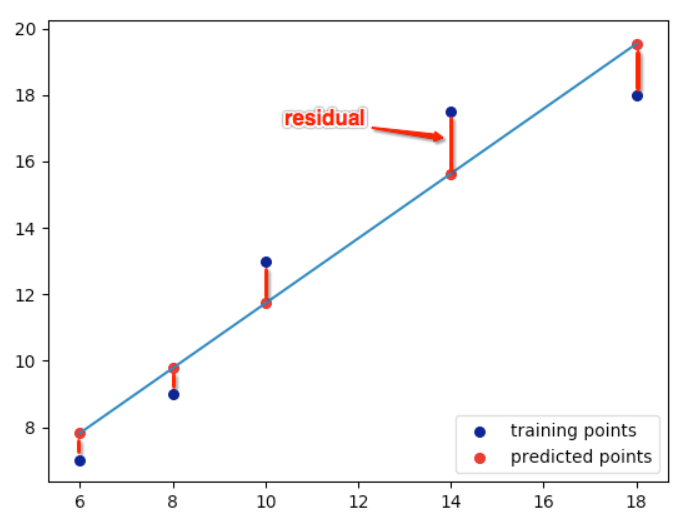
Mathematically, Residual is: $$r={y-(mx+b)}$$
Hence, the sum of the square of residuals is:
<img src="sumOfResiduals.png" width="300">


As we can see that the residual is both a function of m and b, so differentiating partially with respect to m and b will give us:
<img src="partialDerivatives.png" width="300">

For getting the best fit line, residual should be minimum. The minima of a function occurs where the derivative=0. So, equating our corresponding derivatives to 0, we get:
<img src="minima.png" width="300">

This same equation can be written in matrix form as:
<img src="matrix1.png" width="300">

Ideally, if we'd have an equation of one dependent and one independent variable the minima will look as follows:
<img src="minima2.png" width="300">

But as the residual's minima is dependent on two variables m and b, it becomes a _Paraboloid_ and the appropriate m and b are calculated using _*Gradient Descent*_ as shown below:
<img src="GradientDescent.gif" width="300"> Photo:Google

Now, let’s understand how to check, how well the model fits our data.

The new values for 'slope' and 'intercept' are caluclated as follows:

<img src="new_m.PNG" width="300">

where, $\theta_0$ is 'intercept' , $\theta_1$ is the slope, $\alpha$ is the learning rate, m is the total number of observations and the term after the $\sum$ sign is the loss. Google Tensor board recommends a Learning rate between 0.00001 and 10. Generally a smaller learning rate is recommended to avoid overshooting while creating a model.
    

### $R^2$ statistics

The R-squared statistic provides a measure of fit. It takes the form of a proportion—the proportion of variance
explained—and so it always takes on a value between 0 and 1. 
In simple words, it represents how much of our data is being explained by our model. 
For example,  $R^2$ statistic = 0.75, it says that our model fits 75 % of the total data set.
Similarly, if it is 0, it means none of the data points is being explained and a value of 1 represents 100% data explanation.
Mathematically $R^2$ statistic is calculated as :
<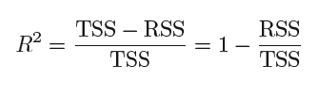>
                                              
Where RSS:  is  the Residual Sum of squares and is given as :
<img src="RSS.PNG">
                                                                
RSS is the residual(error) term we have been talking about so far.
And, TSS:  is  the Total sum of squares and given as :
<img src="TSS.PNG">
                                                             
TSS is calculated when we consider the line passing through the mean value of y, to be the best fit line.
Just like RSS, we calculate the error term when the best fit line is the line passing through the mean value of y and we get the value of TSS.
    <img src="TSS2.PNG">
    
The closer the value of R2 is to 1 the better the model fits our data. If R2 comes below 0(which is a possibility) that means the model is so bad that it is performing even worse than the average best fit line.


### Adjusted $R^2$ statistics
As we increase the number of independent variables in our equation, the R2 increases as well. But that doesn’t mean that the new independent variables have any correlation with the output variable. In other words, even with the addition of new features in our model, it is not necessary that our model will yield better results but R2 value will increase. To rectify this problem, we use Adjusted R2 value which penalises excessive use of such features which do not correlate with the output data.
Let’s understand this with an example:
 
<img src="adjr.PNG" width="300">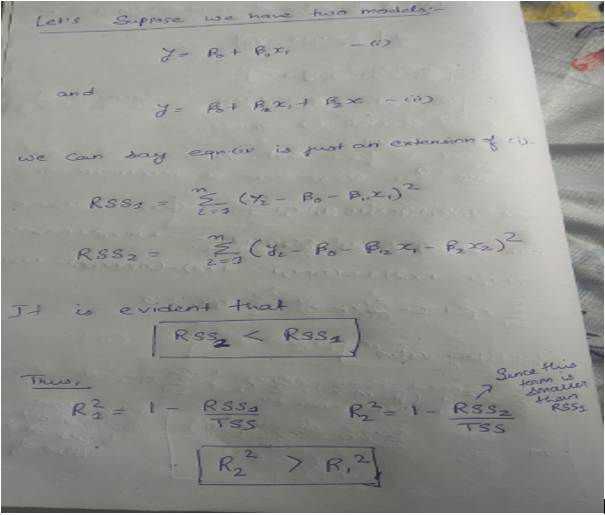
We can see that R2 always increases with an increase in the number of independent variables.
Thus, it doesn’t give a better picture and so we need Adjusted R2 value to keep this in check.
Mathematically, it is calculated as:
                                        <img src="adjr2.PNG">
In the equation above, when p = 0, we can see that adjusted R2 becomes equal to R2.
Thus, adjusted R2  will always be less than or equal to R2, and it penalises the excess of independent variables which do not affect the dependent variable.


In [22]:
# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


### Interpreting the model

How do we interpret the coefficient for spends on TV ad ($\beta_1$)?
- A "unit" increase in spends on a TV ad is **associated with** a 0.047537 "unit" increase in Sales.
- Or, an additional $1,000  on TV ads is **translated to** an increase in sales by 47.53 Dollars.

As an increase in TV ad expenditure is associated with a **decrease** in sales, $\beta_1$ would be **negative**.


## Prediction  using the model

If the expense on TV ad is $50000, what will be the sales prediction for that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$


In [23]:
#calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, we would predict Sales of **9,409 widgets** in that market.

Let's do the same thing using code.

In [24]:
#  Let's create a DataFrame since the model expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [25]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([9.40942557])

### Plotting the Least Squares Line

In [26]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [27]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


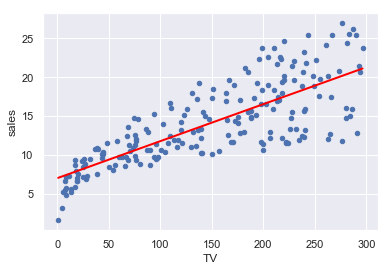

In [28]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

## Model Confidence

**Question:** Is linear regression a low bias/high variance model or a high bias/low variance model?

**Answer:** It's a High bias/low variance model. Even after repeated sampling, the best fit line will stay roughly in the same position (low variance), but the average of the models created after repeated sampling won't do a great job in capturing the perfect relationship (high bias). Low variance is helpful when we don't have less training data! 

If the model has calculated a 95% confidence for our model coefficients, it can be interpreted as follows: 
If the population from which this sample is drawn, is **sampled 100 times**, then approximately **95 (out of 100) of those confidence intervals** shall contain the "true" coefficients.


In [29]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV', data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way actually to know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.


### Hypothesis Testing and p-values

**Hypothesis testing** is Closely related to confidence intervals. We start with a **null hypothesis** and an **alternate hypothesis** (that is opposite to the null). Then, we check whether the data **rejects the null hypothesis** or **fails to reject the null hypothesis**.

("Failing to reject" the null hypothesis does not mean "accepting" the null hypothesis. The alternative hypothesis might indeed be true, but that we just don't have enough data to prove that.)

The conventional hypothesis test is as follows:
- **Null hypothesis:** No relationship exists between TV advertisements and Sales (and hence $\beta_1$ equals zero).
- **Alternative hypothesis:** There exists a relationship between TV advertisements and Sales (and hence, $\beta_1$ is not equal to zero).

How do we test this? We reject the null hypothesis (and thus believe the alternative hypothesis) if the 95% confidence interval **does not include zero**. The **p-value** represents the probability of the coefficient actually being zero.


In [30]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. 

Thus, a p-value of less than 0.05 is a way to decide whether there is any relationship between the feature in consideration and the response or not. Using 0.05 as the cutoff is just a convention.

In this case, the p-value for TV ads is way less than 0.05, and so we **believe** that there is a relationship between TV advertisements and Sales.

Note that we generally ignore the p-value for the intercept.


### How Well Does the Model Fit the data?

One of the most generic way to evaluate the fit of a linear model is by computing the **R-squared** value. R-squared explains the**proportion of variance**, i.e., the proportion of variance in the observed data which the model explains, or the reduction in error over the **null model**. (A null model only predicts the mean of all the observed responses, and thus it only has an intercept and no slope.)

The value of R-squared lies between 0 and 1. A value closer to 1 is better as it means that more variance is explained by the model. 


In [31]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

Is it a "good" R-squared value? Now, that’s hard to say. In reality, the domain to which the data belongs to plays a significant role in deciding the threshold for the R-squared value. Therefore, it's a tool for **comparing different models**.

### Multiple Linear Regression

Till now, we have created the model based on only one feature. Now, we’ll include multiple features and create a model to see the relationship between those features and the label column.
This is called **Multiple Linear Regression**.

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients


In [32]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


How do we interpret these coefficients? 
If we look at the coefficients, the coefficient for the newspaper spends is negative. It means that the money spent for newspaper advertisements is not contributing in a positive way to the sales.

A lot of the information we have been reviewing piece-by-piece is available in the model summary output:


In [33]:
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 27 Dec 2019   Prob (F-statistic):           1.58e-96
Time:                        20:12:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are the things to be learnt from this summary?

- TV and Radio have positive **p-values**, whereas Newspaper has a negative one. Hence, we can reject the null hypothesis for TV and Radio that there is no relation between those features and Sales, but we fail to reject the null hypothesis for Newspaper that there is no relationship between newspaper spends and sales.
- The expenses on bot TV and Radio ads are**positively associated** with Sales, whereas the expense on newspaper ad is **slightly negatively associated** with the Sales.
- This model has a higher value of **R-squared** (0.897) than the previous model, which means that this model explains more variance and provides a better fit to the data than a model that only includes the TV.


### Feature Selection

How do I decide **which features have to be included** in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check if the R-squared value goes up when you add new predictors to the model.

What are the **drawbacks** in this approach?
-If the underlying assumptions for creating a Linear model(the features being independent) are violated(which usually is the case),p-values and R-squared values are less reliable.
- Using a p-value cutoff of 0.05 means that adding 100 predictors to a model that are **pure noise**, still 5 of them (on average) will be counted as significant.
- R-squared is susceptible to **model overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalise. Following is an example:


In [34]:
# only include TV and Radio in the model
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared

0.8971942610828956

In [35]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

Selecting the model with the highest value of R-squared is not a correct approach as the value of R-squared shall always increase whenever a new feature is taken for consideration even if the feature is unrelated to the response.

The alternative is to use **adjusted R-squared** which penalises the model complexity (to control overfitting), but this again generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

a better approach to feature selection is**Cross-validation.** It provides a more reliable way to choose which of the created models will best **generalise** as it better estimates of out-of-sample error. An advantage is that the cross-validation method can be applied to any machine learning model and the scikit-learn package provides extensive functionality for that.


### Handling Categorical Predictors with Two Categories

Till now, all the predictors have been numeric. What if one of the predictors is categorical?

We’ll create a new feature called **Scale**, and shall randomly assign observations as **small or large**:


In [36]:
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Scale'] = 'small'
data.loc[mask_large, 'Scale'] = 'large'
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale
0,1,230.1,37.8,69.2,22.1,large
1,2,44.5,39.3,45.1,10.4,small
2,3,17.2,45.9,69.3,9.3,small
3,4,151.5,41.3,58.5,18.5,small
4,5,180.8,10.8,58.4,12.9,large


For the scikit-learn library, all data must be represented **numerically**. If the feature only has two categories, we can simply create a **dummy variable** that represents the categories as a combination of binary value:

In [38]:
# create a new Series called IsLarge
data['IsLarge'] = data.Scale.map({'small':0, 'large':1})
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale,IsLarge
0,1,230.1,37.8,69.2,22.1,large,1
1,2,44.5,39.3,45.1,10.4,small,0
2,3,17.2,45.9,69.3,9.3,small,0
3,4,151.5,41.3,58.5,18.5,small,0
4,5,180.8,10.8,58.4,12.9,large,1


Let's redo the multiple linear regression problem and include the **IsLarge** predictor:

In [39]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge']
X = data[feature_cols]
y = data.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
i=0
for col in feature_cols:
    print('The Coefficient of ',col, ' is: ',lm.coef_[i])
    i=i+1

The Coefficient of  TV  is:  0.045719820924362775
The Coefficient of  radio  is:  0.1887281431342787
The Coefficient of  newspaper  is:  -0.0010976794483516655
The Coefficient of  IsLarge  is:  0.05742385085482776


How do we interpret the coefficient for **IsLarge**? For a given TV/Radio/Newspaper ad expenditure if the average sales increases by 57.42 widgets, it’s considered as a large market.

What if the 0/1encoding is reversed? Still, the value of the coefficient shall be same, the only difference being the sign. It’ll be a negative number instead of positive.


### Handling Categorical variables with More than Two Categories

Let's create a new column called **Targeted Geography**, and randomly assign observations to be **rural, suburban, or urban**:


In [40]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Targeted Geography'] = 'rural'
data.loc[mask_suburban, 'Targeted Geography'] = 'suburban'
data.loc[mask_urban, 'Targeted Geography'] = 'urban'
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale,IsLarge,Targeted Geography
0,1,230.1,37.8,69.2,22.1,large,1,rural
1,2,44.5,39.3,45.1,10.4,small,0,urban
2,3,17.2,45.9,69.3,9.3,small,0,rural
3,4,151.5,41.3,58.5,18.5,small,0,urban
4,5,180.8,10.8,58.4,12.9,large,1,suburban


We need to represent the ‘Targeted Geography’ column numerically. But mapping urban=0, suburban=1 and rural=2 will mean that rural is two times suburban which is not the case.
Hence, we’ll create another **dummy variable**:


In [41]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data['Targeted Geography'], prefix='Targeted Geography').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale,IsLarge,Targeted Geography,Targeted Geography_suburban,Targeted Geography_urban
0,1,230.1,37.8,69.2,22.1,large,1,rural,0,0
1,2,44.5,39.3,45.1,10.4,small,0,urban,0,1
2,3,17.2,45.9,69.3,9.3,small,0,rural,0,0
3,4,151.5,41.3,58.5,18.5,small,0,urban,0,1
4,5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


What does the encoding say?
* rural is encoded as Targeted Geography_suburban=0 and Targeted Geography_urban=0
* suburban is encoded as Targeted Geography_suburban=1 and Targeted Geography_urban=0
* urban is encoded as Targeted Geography_suburban=0 and Targeted Geography_urban=1

Now the question is: **Why have we used two dummy columns instead of three?**

Because using only two dummy columns, we can capture the information of all the 3 columns. For example, if the value for Targeted Geography_urban as well as Targeted Geography_rural is 0, it automatically means that the data belongs to Targeted Geography_suburban.

This is called handling the **dummy variable trap**. If there are N dummy variable columns, then the same information can be conveyed by N-1 columns.
Let's include the two new dummy variables in the model:



In [42]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge', 'Targeted Geography_suburban', 'Targeted Geography_urban']
X = data[feature_cols]
y = data.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
print(feature_cols, lm.coef_)

['TV', 'radio', 'newspaper', 'IsLarge', 'Targeted Geography_suburban', 'Targeted Geography_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]


How do we interpret the coefficients?
- If all other columns are constant, the _suburban_  geography is associated with an average **decrease** of 106.56 widgets in sales for $1000 spent. 

- if $1000 is spent in an _urban_ geography, it amounts to an average **increase** in Sales of 268.13 widgets

**A final note about dummy encoding:** If we have categories that can be ranked (i.e., worst, bad, good, better, best), we can potentially represent them numerically  as (1, 2, 3, 4, 5) using a single dummy column


## Multi- Collinearity

**Origin of the word:** The word multi-collinearity consists of two words:Multi, meaning multiple, and Collinear, meaning being linearly dependent on each other. 

For e.g.,
		Let’s consider this equation
		$ a+b=1  => b=1-a $
        
It means that ‘b’ can be represented in terms of ‘a’ i.e., if the value of ‘a’ 		changes, automatically the value of ‘b’ will also change. This equation 		denotes a simple linear relationship among two variables.

**Definition:** The purpose of executing a Linear Regression is to predict the value of a 	dependent variable based on certain independent variables.

So, when we perform a Linear Regression, we want our dataset to have variables which are independent i.e., we should not be able to define an 	independent variable with the help of another independent variable  	because now in our model we have two variables which can be defined based 	on a certain set of independent variables which defeats the entire purpose.

* Multi-collinearity is the statistical term to represent this type of a relation amongst the independent variable- when the independent variables are not so independent😊.
* We can define multi-collinearity as the situation where the independent variables (or the predictors) have strong correlation amongst themselves.

<img src="multicollinearity_pic.PNG" width="500">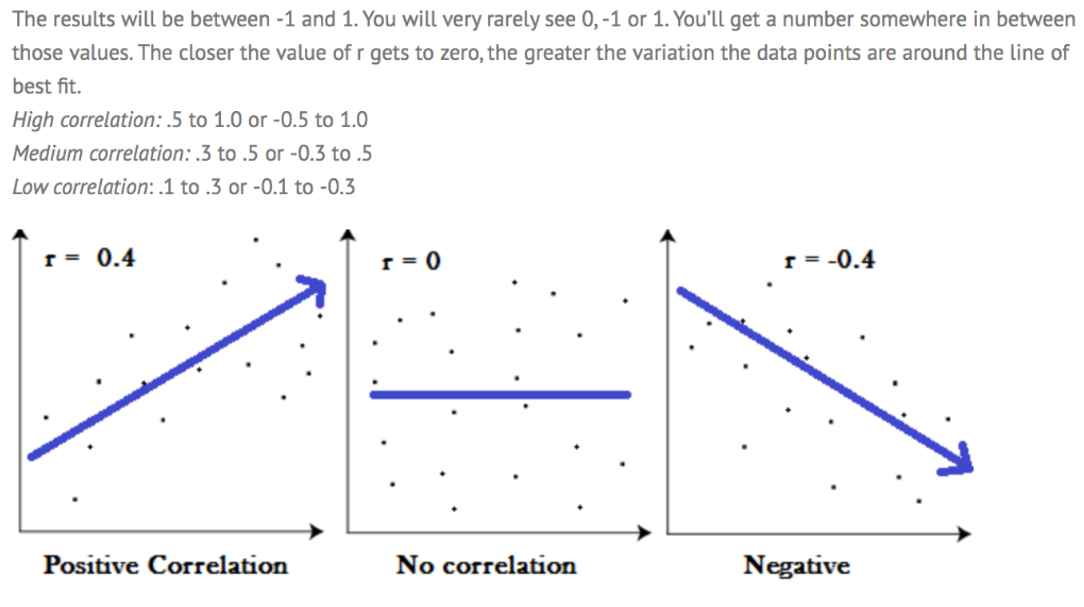

The mathematical flow for multicollinearity can be shown as:
<img src="multicollinearity_flow.PNG" width="500">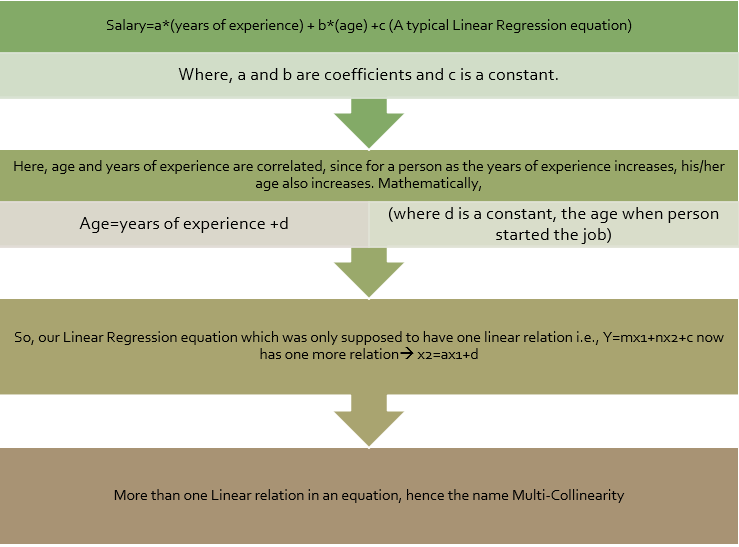

#### Why Should We Care About Multi-Collinearity?
* The coefficients in a Linear Regression model represent the extent of change in Y when a certain x (amongst X1,X2,X3…) is changed keeping others constant. But, if x1 and x2 are dependent, then this assumption itself is wrong that we are changing one variable keeping others constant as the dependent variable will also be changed. It means that our model itself becomes a bit flawed.
* We have a redundancy in our model as two variables (or more than two) are trying to convey the same information.
* As the extent of the collinearity increases, there is a chance that we might produce an overfitted model. An overfitted model works well with the test data but its accuracy fluctuates when exposed to other data sets. 
* Can result in a Dummy Variable Trap.

##### Detection
* __Correlation Matrices and Plots:__ for correlation between all the X variables.
        
        This plot shows the extent of correlation between the independent variable. Generally, a correlation greater than 0.9 or less than -0.9 is to be avoided.
    <img src="cor.PNG" width="500">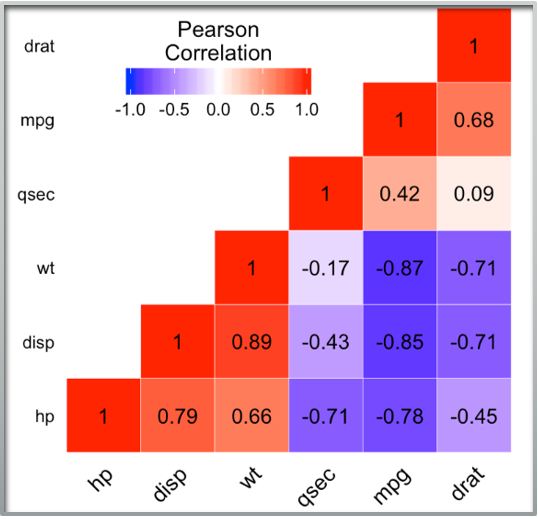
* __Variance Inflation Factor:__ Regression of one X variable against other X variables.

     VIF=$\frac {1}{(1-R squared)}$

            The VIF factor, if greater than 10 shows extreme correlation between the variables and then we need to take care of the correlation.



#### Remedies for Multicollinearity

* **Do Nothing:** If the Correlation is not that extreme, we can ignore it. If the correlated variables are not used in solving our business question, they can be ignored.
* **Remove One Variable**: Like in dummy variable trap
* **Combine the correlated variables:** Like creating a seniority score based on Age and Years of experience
* Principal Component Analysis




### Regularization 
When we use regression models to train some data, there is a good chance that the model will overfit the given training data set.  Regularization helps sort this overfitting problem by restricting the degrees of freedom of a given equation i.e. simply reducing the number of degrees of a polynomial function by reducing their corresponding weights.  
In a linear equation, we do not want huge weights/coefficients as a small change in weight can make a large difference for the dependent variable (Y). So, regularization constraints the weights of such features to avoid overfitting. Simple linear regression is given as:

$y = \beta_0 + \beta_1x1+ \beta_2x2 +\beta_3x3+...+\beta_PxP$

Using the OLS method, we try to minimize the cost function given as:

<img src="RSS_reg.PNG" width="300">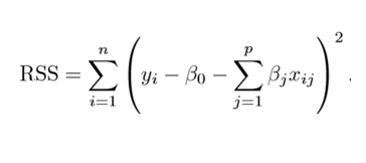

To regularize the model, a Shrinkage penalty is added to the cost function.
Let’s see different types of regularizations in regression:


#### LASSO(Least Absolute Shrinkage and Selection Operator) Regression (L1 Form)
LASSO regression penalizes the model based on the sum of magnitude of the coefficients. The regularization term is given by

 regularization=$ \lambda *\sum  |\beta_j| $

Where, λ is the shrinkage factor.

and hence the formula for loss after regularization is:

<img src="L1.PNG" width="300">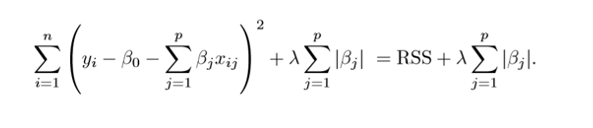

#### Ridge Regression (L2 Form)
Ridge regression penalizes the model based on the sum of squares of magnitude of the coefficients. The regularization term is given by

 regularization=$ \lambda *\sum  |\beta_j ^ 2| $

Where, λ is the shrinkage factor.

and hence the formula for loss after regularization is:

<img src="ridge.PNG" width="300">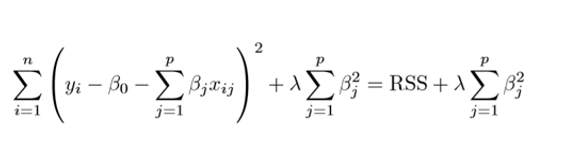

This value of lambda can be anything and should be calculated by cross validation as to what suits the model.

Let’s consider $\beta_1$ and $\beta_2$ be coefficients of a linear regression and λ = 1:

For Lasso, $\beta_1$ + $\beta_2$ <= s  

For Ridge, $\beta_1^2$ + $\beta_2^2$  <= s  

Where s is the maximum value the equations can achieve
.
If we plot both the above equations, we get the following graph:

<img src="ridge_vs_lasso.PNG" width="300">

The red ellipse represents the cost function of the model, whereas the square (left side) represents the Lasso regression and the circle (right side) represents the Ridge regression.


##### Difference between Ridge and Lasso
Ridge regression shrinks the coefficients for those predictors which contribute very less in the model but have huge weights, very close to zero. But it never makes them exactly zero. Thus, the final model will still contain all those predictors, though with less weights. This doesn’t help in interpreting the model very well. This is where Lasso regression differs with Ridge regression. In Lasso, the L1 penalty does reduce some coefficients exactly to zero when we use a sufficiently large tuning parameter λ. So, in addition to regularizing, lasso also performs feature selection.


##### Why use Regularization?
Regularization helps to reduce the variance of the model, without a substantial increase in the bias. If there is variance in the model that means that the model won’t fit well for dataset different that training data. The tuning parameter λ controls this bias and variance tradeoff. When the value of λ is increased up to a certain limit, it reduces the variance without losing any important properties in the data. But after a certain limit, the model will start losing some important properties which will increase the bias in the data. Thus, the selection of good value of λ is the key.
The value of λ is selected using cross-validation methods. A set of λ is selected and cross-validation error is calculated for each value of λ and that value of λ is selected for which the cross-validation error is minimum.


##### Elastic Net

According to the Hands-on Machine Learning book, elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio α. 

<img src="elasticNet.PNG" width="300">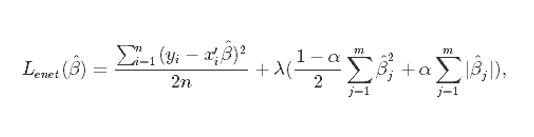
where α is the mixing parameter between ridge (α = 0) and lasso (α = 1).


**When should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net?**

According to the Hands-on Machine Learning book, it is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of
training instances or when several features are strongly correlated.

No let's see the Python Implementation of these concepts:


In [43]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [44]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [45]:
data =pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [46]:
data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [47]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean())

In [48]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Now the data looks good and there are no missing values. Also, the first cloumn is just serial numbers, so we don' need that column. Let's drop it from data and make it more clean.

In [49]:
data= data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


Let's visualize the data and analyze the relationship between independent and dependent variables:

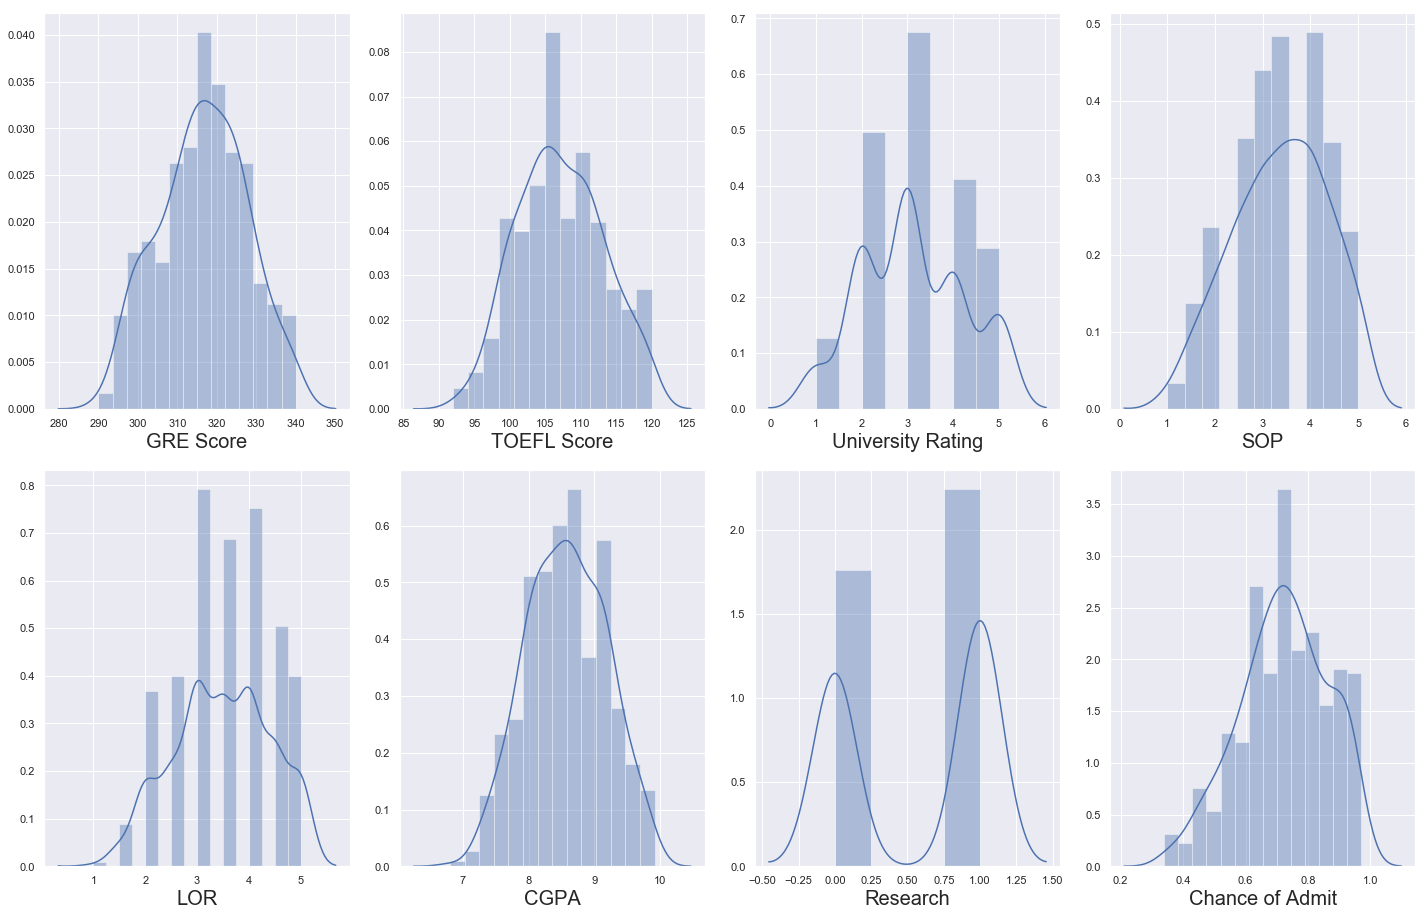

In [50]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

The data distribution looks decent enough and there doesn't seem to be any skewness. Great let's go ahead!

Let's observe the relationship between independent variables and dependent variable.


In [51]:
y = data['Chance of Admit']
X =data.drop(columns = ['Chance of Admit'])

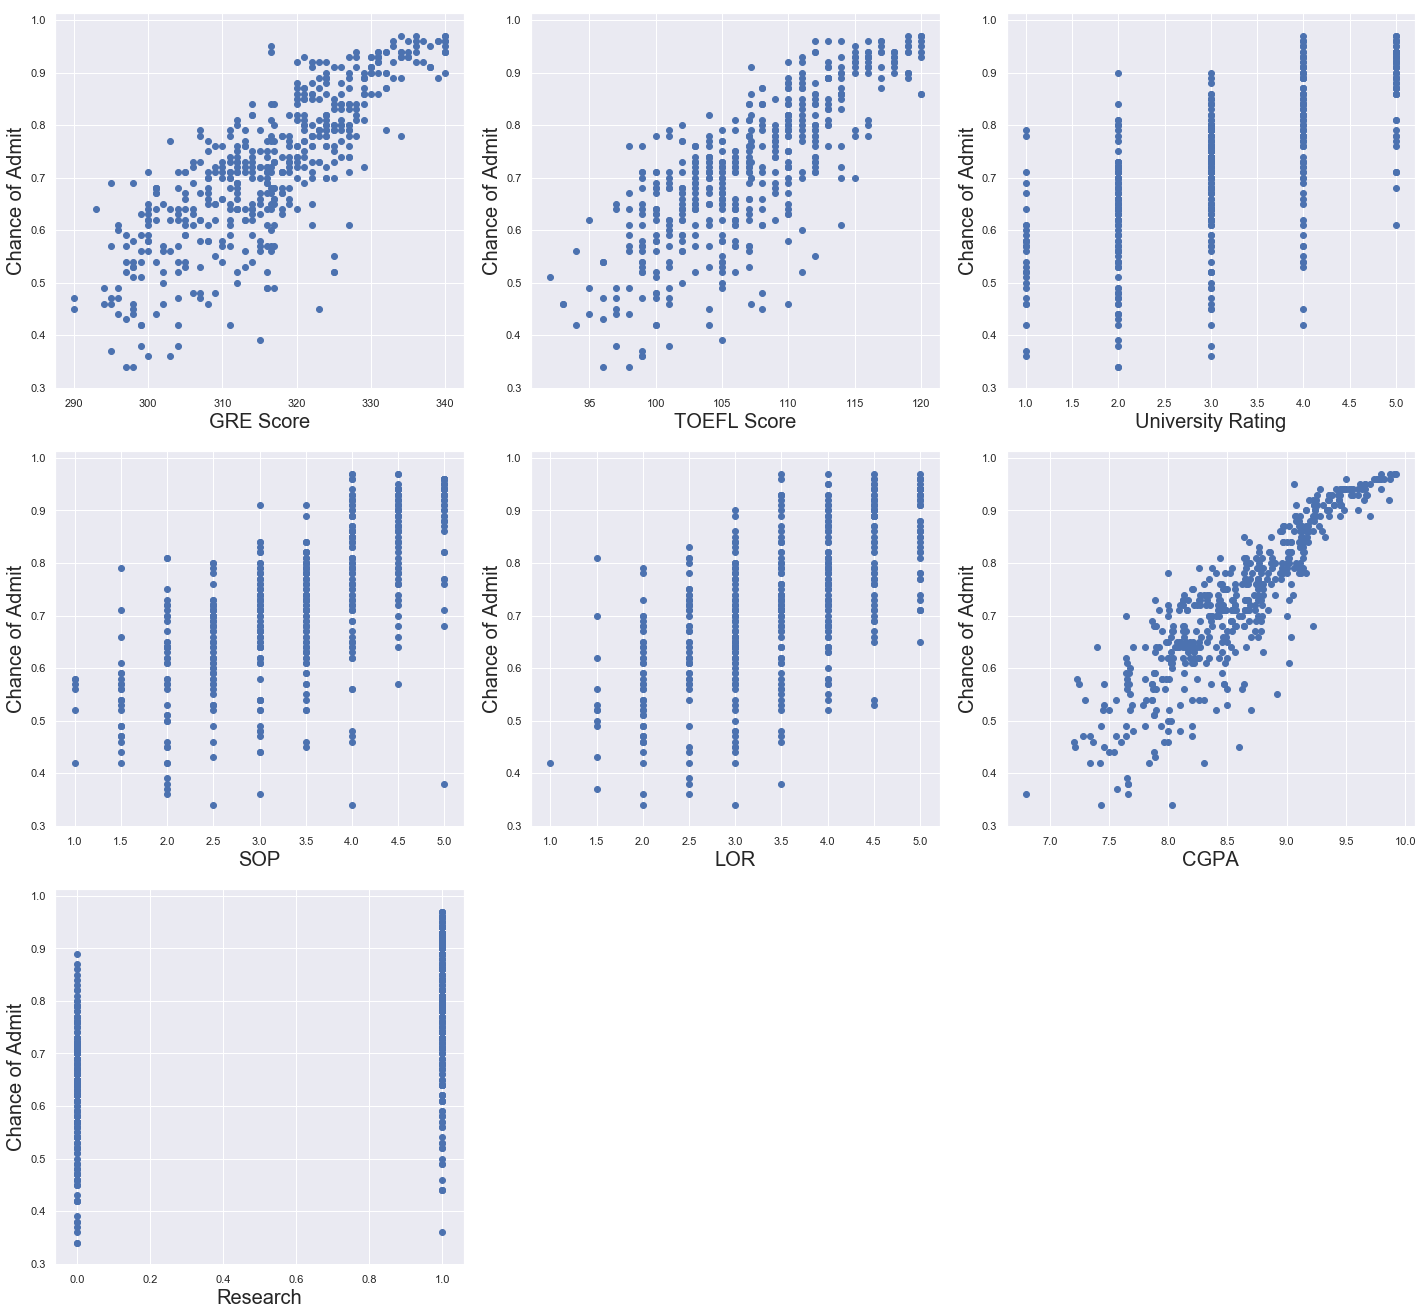

In [52]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear.
Thus, our linearity assumption is satisfied.

Let's move ahead and check for multicollinearity.

In [53]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

C:\Users\virat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\virat\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [55]:
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go. 

Great. Let's go ahead and use linear regression and see how good it fits our data.
But first. let's split our data in train and test.

In [56]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [57]:
y_train

378    0.56
23     0.95
122    0.57
344    0.47
246    0.72
409    0.61
197    0.73
116    0.56
83     0.92
91     0.38
106    0.87
258    0.77
444    0.92
304    0.62
12     0.78
392    0.84
462    0.62
204    0.69
250    0.74
370    0.72
313    0.67
126    0.85
424    0.91
457    0.37
100    0.71
17     0.65
140    0.84
40     0.46
279    0.67
64     0.52
       ... 
362    0.91
221    0.75
209    0.68
201    0.72
406    0.61
480    0.80
403    0.91
225    0.61
177    0.82
487    0.79
152    0.86
417    0.52
336    0.72
329    0.43
447    0.84
438    0.67
333    0.71
402    0.78
45     0.88
285    0.93
31     0.74
430    0.74
95     0.42
401    0.66
255    0.79
51     0.56
291    0.56
346    0.47
130    0.96
254    0.85
Name: Chance of Admit, Length: 375, dtype: float64

In [58]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [60]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([0.92190162])

In [61]:
regression.score(x_train,y_train)

0.8415250484247909

In [62]:
adj_r2(x_train,y_train)

0.8385023654247188

Our r2 score is 84.15% and adj r2 is 83.85% for our training et., so looks like we are not being penalized by use of any feature.

Let's check how well model fits the test data.

Now let's check if our model is overfitting our data using regularization.

In [63]:
regression.score(x_test,y_test)

0.7534898831471066

In [64]:
adj_r2(x_test,y_test)

0.7387414146174464

So it looks like our model r2 score is less on the test data.

Let's see if our model is overfitting our training data.

In [65]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [66]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

3.0341655445178153e-05

In [67]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.0341655445178153e-05, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
lasso_reg.score(x_test, y_test)

0.7534654960492284

our r2_score for test data (75.34%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [69]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

C:\Users\virat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([9.9446 , 1.62429, 7.676  , 2.58657, 7.3006 , 9.31714, 3.34469,
       3.0428 , 5.83061, 8.5141 , 8.55828, 2.34786, 3.42601, 5.34558,
       3.09892, 7.2427 , 7.43945, 7.75282, 8.17264, 1.79508, 7.422  ,
       5.44549, 9.15021, 5.42831, 1.34016, 8.0355 , 1.81993, 2.40259,
       2.7257...11 , 3.51759,
       3.40962, 9.77374, 2.42211, 1.17214, 7.2834 , 3.93244, 2.20177,
       0.84324]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)

In [73]:
ridgecv.alpha_

0.8432446610176114

In [74]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.8432446610176114, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [75]:
ridge_model.score(x_test, y_test)

0.7538937537809315

we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

In [76]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [77]:
elasticCV.alpha_

0.0011069728449315508

In [78]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [79]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0011069728449315508, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [80]:
elasticnet_reg.score(x_test, y_test)

0.7531695370639867

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.

### Polynomial Regression

For understanding Polynomial Regression, let's first understand a polynomial.
Merriam-webster defines a polynomial as:
"_A mathematical expression of one or more algebraic terms each of which consists of a constant multiplied by one or more variables raised to a non-negative integral power (such as a + bx + cx^2)"._
Simply said, poly means many. So, a polynomial is an aggregation of many monomials(or Variables).
A simple polynomial equation can be written as:
$$y = {a+bx + cx^2+...+nx^n+...}$$

So, Polynomial Regression can be defined as a mechanism to predict a _dependent variable_ based on the polynomial relationship with the _independent variable_.

 In the equation, _$$y= {a+bx + cx^2+...+nx^n+...}$$_ the maximum power of 'x' is called the degree of the polynomial equation.
 For example, if the degree is 1, the equation becomes $$y={a+bx}$$ which is a simple linear equation.
              if the degree is 2, the equation becomes $$y = {a+bx + cx^2}$$ which is a quadratic equation and so on.

## When to use Polynomial Regression?
Many times we may face a requirement where we have to do a regression, but when we plot a graph between a dependent and independent variables, the graph doesn't turn out to be a linear one.
A linear graph typically looks like:
<img src="LinearGraph.png" width="300">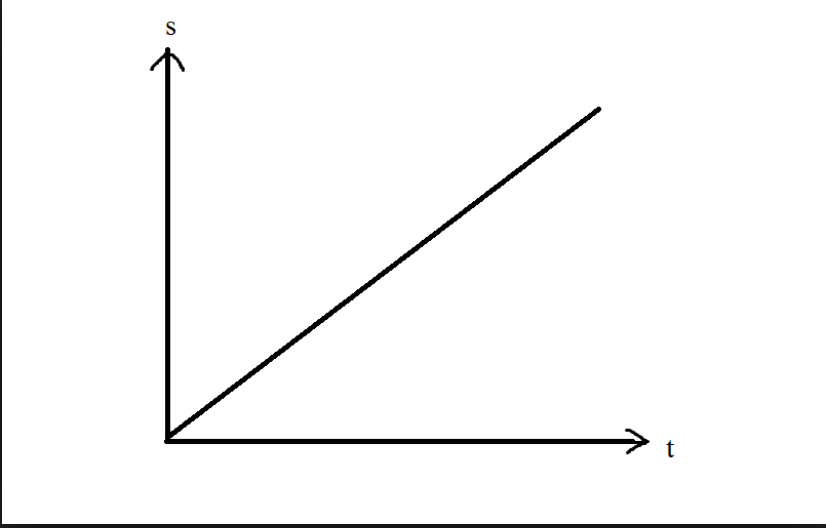

But what if the relationship looks like:
<img src="PolynomialGraph.png" width="300">

It means that the relationship between X and Y can't be described Linearly.
Then comes the time to use the Polynomial Regression.

We can generalize the matrix obtained above (for Linear Regression) for an equation of n coefficients(in y=mx+b, m and b are the coefficients) as follows: 
![image.png](generalEquation.png)
Where m is the _degree_(maximum power of x) of the polynomial and n is the number of observation points.
The above matrix results in the general formula for Polynomial Regression.
Earlier, we were able to visualize the calculation of minima because the graph was in three dimensions. But as there are n number of coefficients, it's not possible to create an (n+1)  dimension graph here. 

As we have the maths clear, now Let's focus on the Python implementation of it

In [4]:
#Necessary Imports for importing the required modules to be used
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline   
# this makes sure that the graphs are printed in the jupyter notebook itself

In [5]:
#importing the dataset
dataset= pd.read_csv('Position_Salaries.csv') # the full namespace of the file can be provided if the file is not in the same directory as the .ipynb or.py file
dataset.head()   # to see how the imported data looks like

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


Here, it can be seen that there are 3 columns in the dataset. The problem statement here is to predict the salary based on the
Position and Level of the employee.
But we may observe that the Position and the level are related or level is one other way of conveying the position of the employee in the company. So, essentially Position and Level are conveying the same kind of information. As Level is a numeric column, let's use that in our Machine Learning Model.
Hence, Level is our feature or X variable.
And, Salary is Label or the Y variable

In [6]:
x=dataset.iloc[:,1:2].values
#x=dataset.iloc[:,1].values
# this is written in this way to make x as a matrix as the machine learning algorithm.
# if we write 'x=dataset.iloc[:,1].values', it will return x as a single-dimensional array which is not desired 
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [7]:
y=dataset.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

Generally, we divide our dataset into two parts
1) The training dataset to train our model. And,
2) The test dataset to test our prepared model.
Here, as the dataset has a limited number of entries, we won't do a split.
Instead of that, we'd use direct numerical values to test the model.
Hence, the code above is kept commented.
But, train test split can also be done, if you desire so:)
    
To learn Polynomial Regression, we'd follow a comparative approach.
First, we'll try to create a Linear Model using Linear Regression and then we'd prepare a Polynomial Regression Model and see how do they compare to each other

In [8]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Visualising the Linear Regression results


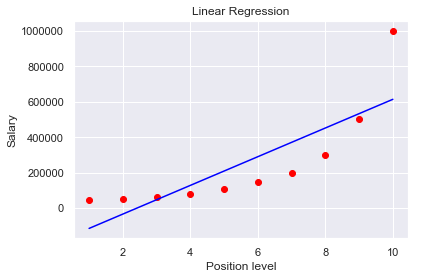

In [9]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Here, the red dots are the actual data points and, the blue straight line is what our model has created.
It is evident from the diagram above that a Linear model does not fit our dataset well. So, let's try with a Polynomial Model.

In [10]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  #trying to create a 2 degree polynomial equation. It simply squares the x as shown in the output
X_poly = poly_reg.fit_transform(x)
print(X_poly)
poly_reg.fit(X_poly, y)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [11]:
# doing the actual polynomial Regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

It can be noted here that for Polynomial Regression also, we are using the Linear Regression Object.
###### Why is it so?
It is because the Linear in Linear Regression does not talk about the degree of the Polynomial equation in terms of the dependent variable(x). Instead, it talks about the degree of the coefficients. Mathematically,
$$y = {a+bx + cx^2+...+nx^n+...}$$
It's not talking about the power of x, but the powers of a,b,c etc.
And as the  coefficients are only of degree 1, hence the name Linear Regression.

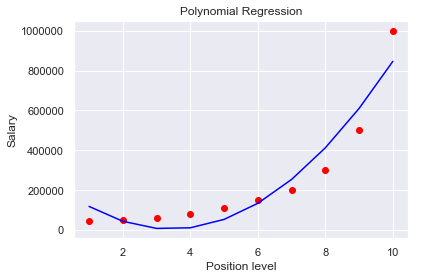

In [12]:
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Still, a two degree equation is also not a good fit. 
Now, we'll try to increase the degree of the equation i.e. we'll try to see that whether we get a good fit at a higher degree or not.
After some hit and trial, we see that the model get's the best fit for a 4th degree polynomial equation.

In [13]:
# Fitting Polynomial Regression to the dataset
poly_reg1 = PolynomialFeatures(degree = 4)
X_poly1 = poly_reg1.fit_transform(x)
poly_reg1.fit(X_poly, y)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

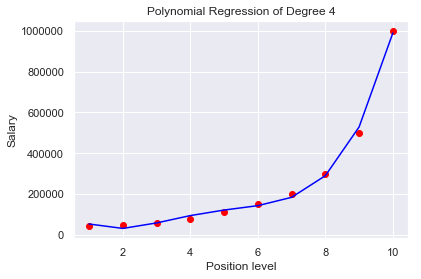

In [14]:
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_3.predict(poly_reg1.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression of Degree 4')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Here, we can see that our model now accurately fits the dataset. This kind of a fit might not be the case with the actual business datasets.
we  are getting a brilliant fit as the number of datapoints are a  few.

### Cloud Deployment (Google Cloud Platform)

Once the training is completed, we need to expose the trained model as an API for the user to consume it. For prediction, the saved model is loaded first and then the predictions are made using it. If the web app works fine, the same app is deployed to the cloud platform. The application flow for cloud deployment looks like:

<img src="testing_pipeline.PNG" width= "300">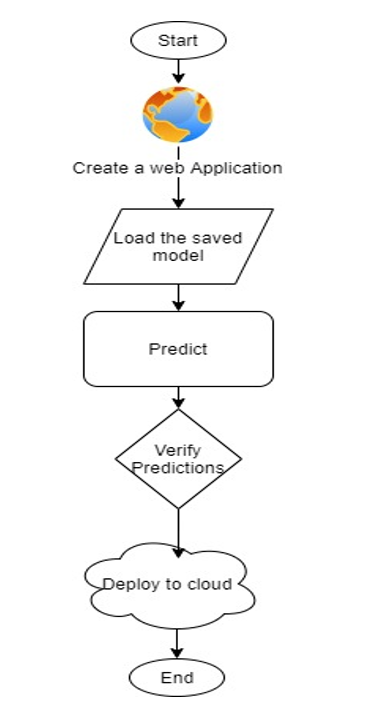

### Pre-requisites:
* Basic knowledge of flask framework.
* Any Python IDE installed(we are using PyCharm).
* A Google Cloud Platform account.
* Basic understanding of HTML.


###### Flask App

As we’ll expose the created model as a web API to be consumed by the client/client APIs, we’d do it using the flask framework. 
The flow of our flask app will be:
<img src="flask_flow.PNG" width= "300">

Create the project structure, as shown below:
<img src="folder_structure.PNG" width= "300">

#### Deployment to G-cloud:

* Go to https://cloud.google.com/ and create an account if already haven’t created one. Then go to the console of your account.
* Go to IAM and admin(highlighted) and click manage resources
<img src="iam.PNG" width= "300">

* Click CREATE PROJECT to create a new project for deployment.
* Once the project gets created, select App Engine and select Dashboard.
<img src="dashboard.PNG" width= "300">

* Go to https://dl.google.com/dl/cloudsdk/channels/rapid/GoogleCloudSDKInstaller.exe to download the google cloud SDK to your machine.
* Click Start Tutorial on the screen and select Python app and click start.
<img src="tutorial.PNG" width= "300">

* Check whether the correct project name is displayed and then click next.
<img src="setup.PNG" width= "300">

* Create a file ‘app.yaml’ and put  ‘runtime: python37’ in that file.
* Create a ‘requirements.txt’ file by opening the command prompt/anaconda prompt, navigate to the project folder and enter the command ‘pip freeze > requirements.txt’.
It is recommended to use separate environments for different projects.
* Your python application file should be called ‘main.py’. It is a GCP specific requirement.
* Open command prompt window, navigate to the project folder and enter the command gcloud init to initialise the gcloud context.
* It asks you to select from the list of available projects.
<img src="select_project.PNG" width= "300">

* Once the project name is selected, enter the command gcloud app deploy app.yaml 
--project <project name>
    
* After executing the above command, GCP will ask you to enter the region for your application. Choose the appropriate one.
<img src="region_select.PNG" width= "300">

* GCP will ask for the services to be deployed. Enter ‘y’ to deploy the services.
* And then it will give you the link for your app,and the deployed app looks like:

<img src="final_snap.PNG" width= "300">
